# Brain

In [1]:
%pylab inline

import sigpy as sp
from demo_brain import *

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

Populating the interactive namespace from numpy and matplotlib


In [2]:
W = sp.linop.Wavelet((230, 180))

In [3]:
msk = (np.linalg.norm(np.load("data/brain/ksp.npy"), axis=0) > 1e-8).astype(np.float32)
rss = (np.linalg.norm(np.load("data/brain/mps.npy"), axis=0) > 1e-8).astype(np.float32)

In [4]:
lp_time = np.load("results/brain/lp/time.npy")
lp_iter  = [(rss * W.H(np.load("results/brain/lp/iter_%03d.npy" % (k + 1))))[::-1, :] for k in range(lp_time.size)]

In [5]:
pc_time = np.load("results/brain/pc/time.npy")
pc_iter  = [(rss * W.H(np.load("results/brain/pc/iter_%03d.npy" % (k + 1))))[::-1, :] for k in range(pc_time.size)]

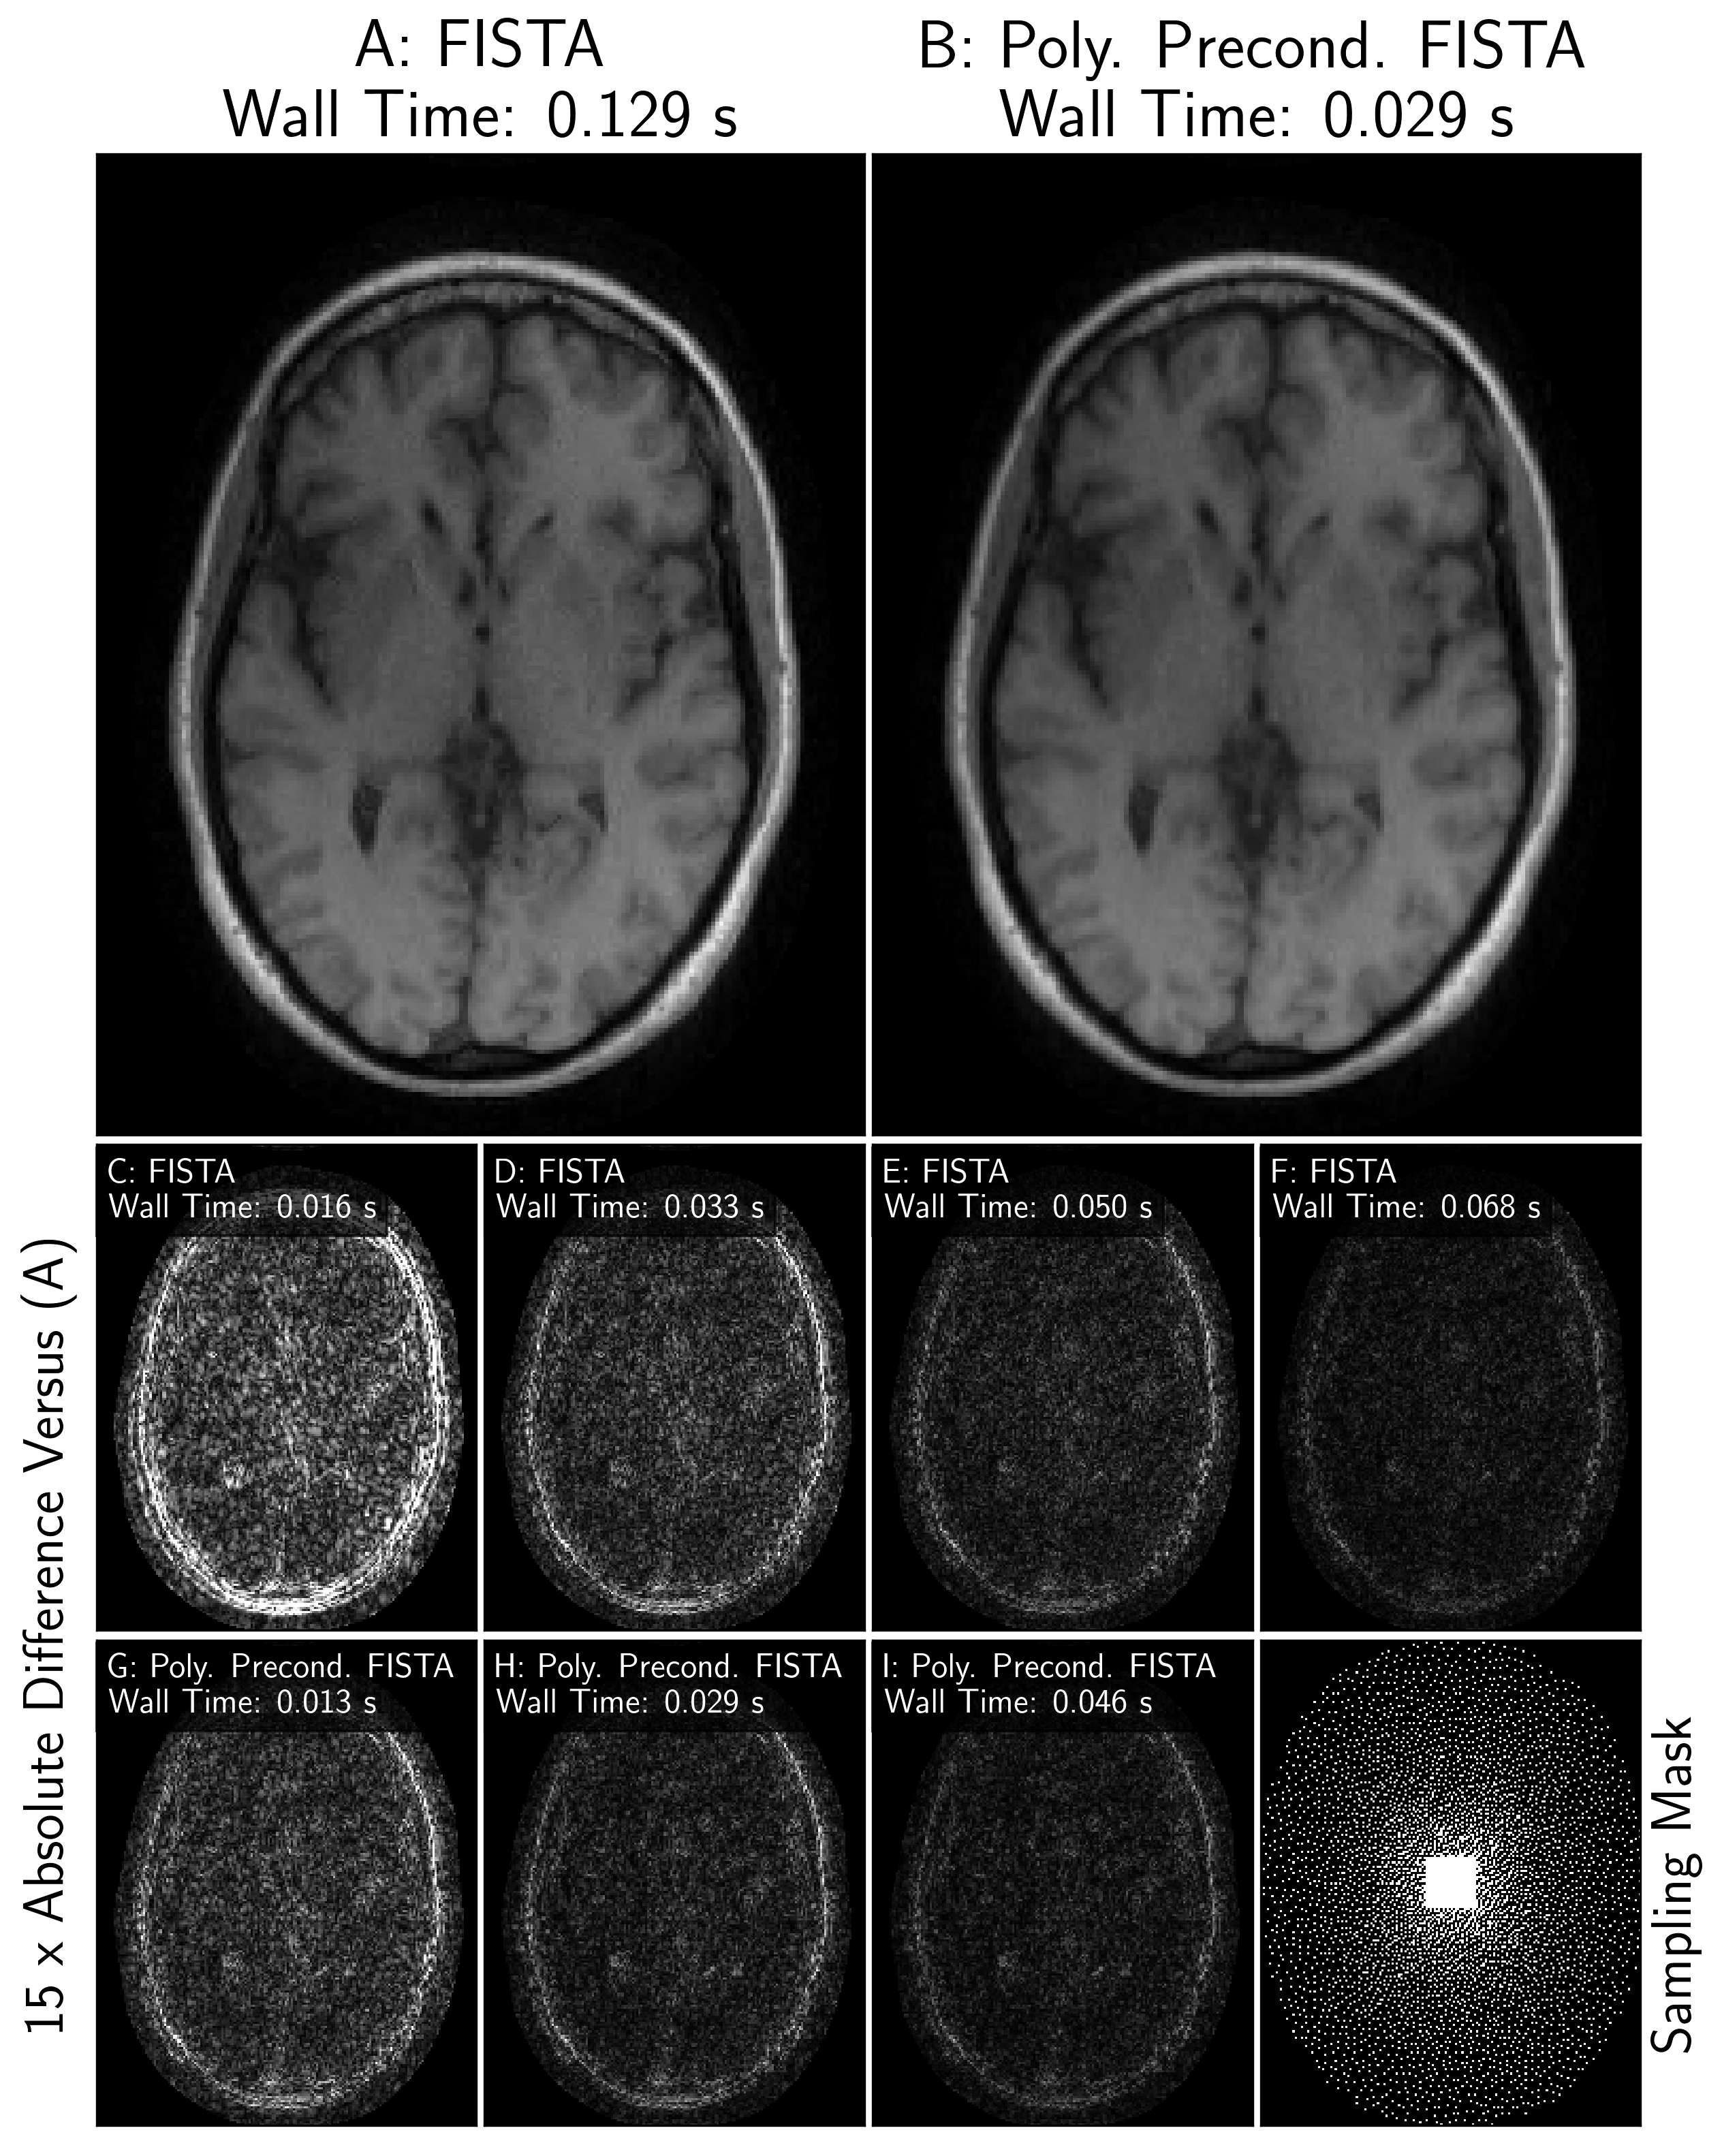

In [6]:
fig, axs = plt.subplots(4, 4, figsize=(10, 10 * 23/18), dpi=300)

def helper(axs, title, fontsize=24):
    axs.set_xticks([])
    axs.set_yticks([])
    axs.set_title(title, fontsize=fontsize)
    
lp_ref = -1
pc_ref = 1

vmin   = 0
vmax   = 0.02
errscl = 15
alpha  = 0.7

time_axis = np.linspace(max(pc_time[0], lp_time[0]), lp_time[lp_ref], 4)

gs = axs[0, 0].get_gridspec()
for iax in axs[0:2]:
    for ax in iax[0:2]:
        ax.remove()
ax0 = fig.add_subplot(gs[0:2, 0:2])

gs = axs[0, 2].get_gridspec()
for iax in axs[0:2]:
    for ax in iax[2:4]:
        ax.remove()
ax1 = fig.add_subplot(gs[0:2, 2:4])

lst_legend = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R"]
fontsize = 12

for k in range(4):
    
    k2 = k
    k1 = np.argmin(np.abs(lp_time - pc_time[k2]))
    while lp_time[k1] < pc_time[k2]:
        k1 += 1

    axs[2][k].imshow(errscl * np.abs(lp_iter[k1] - lp_iter[lp_ref]),  cmap="gray", vmin=vmin, vmax=vmax)
    axs[2][k].text(5, 34, "%s: FISTA\nWall Time: %0.3f s" % (lst_legend[k + 2], lp_time[k1]), color="white", \
                   fontsize=fontsize, bbox=dict(facecolor='black', alpha=alpha))
    
    if k < 3:
        axs[3][k].imshow(errscl * np.abs(pc_iter[k2] - lp_iter[lp_ref]), cmap="gray", vmin=vmin, vmax=vmax)
        axs[3][k].text(5, 34, "%s: Poly. Precond. FISTA\nWall Time: %0.3f s" % (lst_legend[k + 6], pc_time[k2]), color="white", \
                       fontsize=fontsize, bbox=dict(facecolor='black', alpha=alpha))
    helper(axs[2][k], r"")
    helper(axs[3][k], r"")

fig.text(0.0975, 0.314, "%d x Absolute Difference Versus (A)" % errscl, va='center', rotation='vertical', fontsize=20)

ax0.imshow(np.abs(np.squeeze(lp_iter)[lp_ref]), cmap="gray", vmin=vmin, vmax=vmax)
ax1.imshow(np.abs(np.squeeze(pc_iter)[pc_ref]), cmap="gray", vmin=vmin, vmax=vmax)

helper(ax0, "%s: FISTA\nWall Time: %0.3f s" % (lst_legend[0], lp_time[lp_ref]))
helper(ax1, "%s: Poly. Precond. FISTA\nWall Time: %0.3f s" % (lst_legend[1], pc_time[pc_ref]))

axs[-1][-1].imshow(msk, cmap="gray")
axs[-1][-1].yaxis.set_label_position("right")
axs[-1][-1].set_ylabel(r"Sampling Mask", fontsize=20)

plt.subplots_adjust(wspace=-0.075, hspace=0.02)

plt.savefig('figures/brain.png')
!convert -trim figures/brain.png figures/brain.png

Done.